<a href="https://colab.research.google.com/github/andylynchul/ET5003_Assignments/blob/master/Week%205/Final_2028189_ET5003_KaggleCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [6]:
#@title Current Date
Today = '' #@param {type:"date"}


In [5]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "20208189" #@param {type:"string"}
Student_full_name = "Andrew Lynch" #@param {type:"string"}
#@markdown ---

In [4]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Final' #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

# Introduction 

**The goal is to use advanced Machine Learning methods to predict House price. **
 
The data set supplied consists of a data set with features describing a house with a mixture of numeric, categoric and text-based data.
 
The approach to this exercise is to apply EDA to decide on the relevant features to be used to build the models. The text-based features will be passed through an NLP pipeline to extract and offer additional features to model the data on.
 
The prepared data set will be then used to train both a Piecewise Bayesian Regression model and a Bayesian Neural Network to allow for a comparison of results.
 
The resulting BNN model will be used then to process a test set of data to predict a price for each of the entries. This resulting dataset will be submitted to Kaggle to be tested against a known data set to test the results.
 
## Natural Language Processing
The NLP aspect of this exercise involved analysing the text based features of the data set. The text based features ['Features','Description'] are not suitable for direct inclusion in the model generation. An NLP pipeline was identified as an approach that could process the text and distill the text down to some features that could be appended to the original data to add value to the model generation
 
## Piecewise Regression Modelling
**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):
 
Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 
 
* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 
 
* The boundaries between the segments are breakpoints.
 
* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 
 
## Bayesian Neural Networks
 
A [Bayesian network] (https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 
 
* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.
 
## Testing & Analysis
The approach was to create a pipeline that prepared the data, applied the NLP processing, built the models, processed the live data, and exported to a Kaggle formatted data file. The parameters were tuned to find the optimum configuration. This was assessed using the resulting MAE, MAPE, MSLE.
 
## Live Predications & Kaggle
Once a satisfactory result was obtained on the train / test data the outputted data file was submitted to the Kaggle Competition (Team6)
 
 
 
 




# Imports

In [ ]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [ ]:
import logging
logger = logging.getLogger('my_logger')

logging.basicConfig(
    filename='app.log', # write to this file
    filemode='a', # open in append mode
    format='%(name)s - %(levelname)s - %(message)s'
    )

logging.warning('This will get logged to a file')

In [ ]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [ ]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install gpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [ ]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

## Global (Tuning) Variables

In [ ]:
# Global Varoable
drop_features = ['Index','ID','Services','Location']
include_featues = ['Num_Bathrooms','Num_Beds','Price','BER_class','Type','Surface']
nlp_features = ['Features','Description']
vectorizer = TfidfVectorizer(stop_words='english', max_features=5, max_df=0.5, smooth_idf=True, ngram_range=(2,5))

#Exploratory Data Analysis

## Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Path, copy the path from your Drive
Path = '/content/drive/MyDrive/Masters/Year2/ET5003/Week5/Data/'

# House Data
train_data = Path + 'HousePrice_Train.csv'
test_data = Path + 'HousePrice_Test.csv'

# train data
df_train = pd.read_csv(train_data)

# test data
df_test = pd.read_csv(test_data)

print(df_train.shape)
print(df_test.shape)
#print(df_cost.shape)

Mounted at /content/drive
(1638, 14)
(702, 13)


In [ ]:
df_train.tail(3)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
1635,1636,12426975,Lucan,2,3,A3,DNG Lucan's leading estate agents are delighte...,NaN,None,53.351667,-6.435278,semi-detached,98.0,340000
1636,1637,12198921,Sandymount,8,8,D2,Holyrood Castle is a most distinctive 19th cen...,NaN,None,53.328997,-6.221030,detached,507.0,2500000
1637,1638,12314237,Shankill,2,2,E1,A superb opportunity awaits to acquire this be...,NaN,Turn key condition\nWood burning stove\nSlider...,53.231438,-6.125022,semi-detached,50.0,370000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1638 non-null   int64  
 1   ID             1638 non-null   int64  
 2   Location       1638 non-null   object 
 3   Num_Bathrooms  1638 non-null   int64  
 4   Num_Beds       1638 non-null   int64  
 5   BER_class      1387 non-null   object 
 6   Description    1638 non-null   object 
 7   Services       577 non-null    object 
 8   Features       1638 non-null   object 
 9   Latitude       1638 non-null   float64
 10  Longitude      1638 non-null   float64
 11  Type           1638 non-null   object 
 12  Surface        1638 non-null   float64
 13  Price          1638 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 179.3+ KB


In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,1638.0,8.195000e+02,472.994186,1.000000e+00,4.102500e+02,8.195000e+02,1.228750e+03,1.638000e+03
ID,1638.0,1.231930e+07,144754.041968,1.118567e+07,1.228104e+07,1.238055e+07,1.240548e+07,1.242836e+07
Num_Bathrooms,1638.0,2.054335e+00,1.241259,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
Num_Beds,1638.0,3.043346e+00,1.379650,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,2.700000e+01
Latitude,1638.0,5.335047e+01,0.076832,5.250186e+01,5.329426e+01,5.334139e+01,5.338203e+01,5.363059e+01
Longitude,1638.0,-6.255086e+00,0.144430,-6.497000e+00,-6.309613e+00,-6.247780e+00,-6.193982e+00,-1.744995e+00
Surface,1638.0,1.695407e+02,1791.793934,3.400000e+00,7.300000e+01,9.705000e+01,1.350000e+02,7.223639e+04
Price,1638.0,5.547196e+05,565203.162814,1.999500e+04,2.950000e+05,3.950000e+05,5.950000e+05,8.900000e+06


In [ ]:
# Use this to get some high level information about the missing data
df_train.isna().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

## Missing Values

In [ ]:
# Find the number of nulls/NaNs in the dataset as a percentage to see if any columns need to be considered for removal
print("Read of missing values as percentage of data set")
df_train.isna().sum()*100/len(df_train)

Read of missing values as percentage of data set


Index             0.000000
ID                0.000000
Location          0.000000
Num_Bathrooms     0.000000
Num_Beds          0.000000
BER_class        15.323565
Description       0.000000
Services         64.774115
Features          0.000000
Latitude          0.000000
Longitude         0.000000
Type              0.000000
Surface           0.000000
Price             0.000000
dtype: float64

## Correlation Analysis

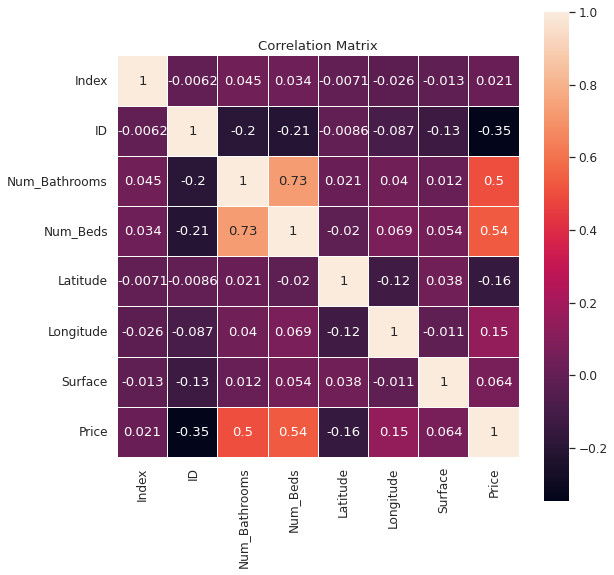

In [ ]:
# calculate the correlation matrix
corr = df_train.corr()

# plot the heatmap
sns.set(font_scale=1.10)
plt.figure(figsize=(9, 9))
plt.title('Correlation Matrix')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,linewidths=0.01,square=True,annot=True)

## Pairwise Plots



Pairplots of numerical features


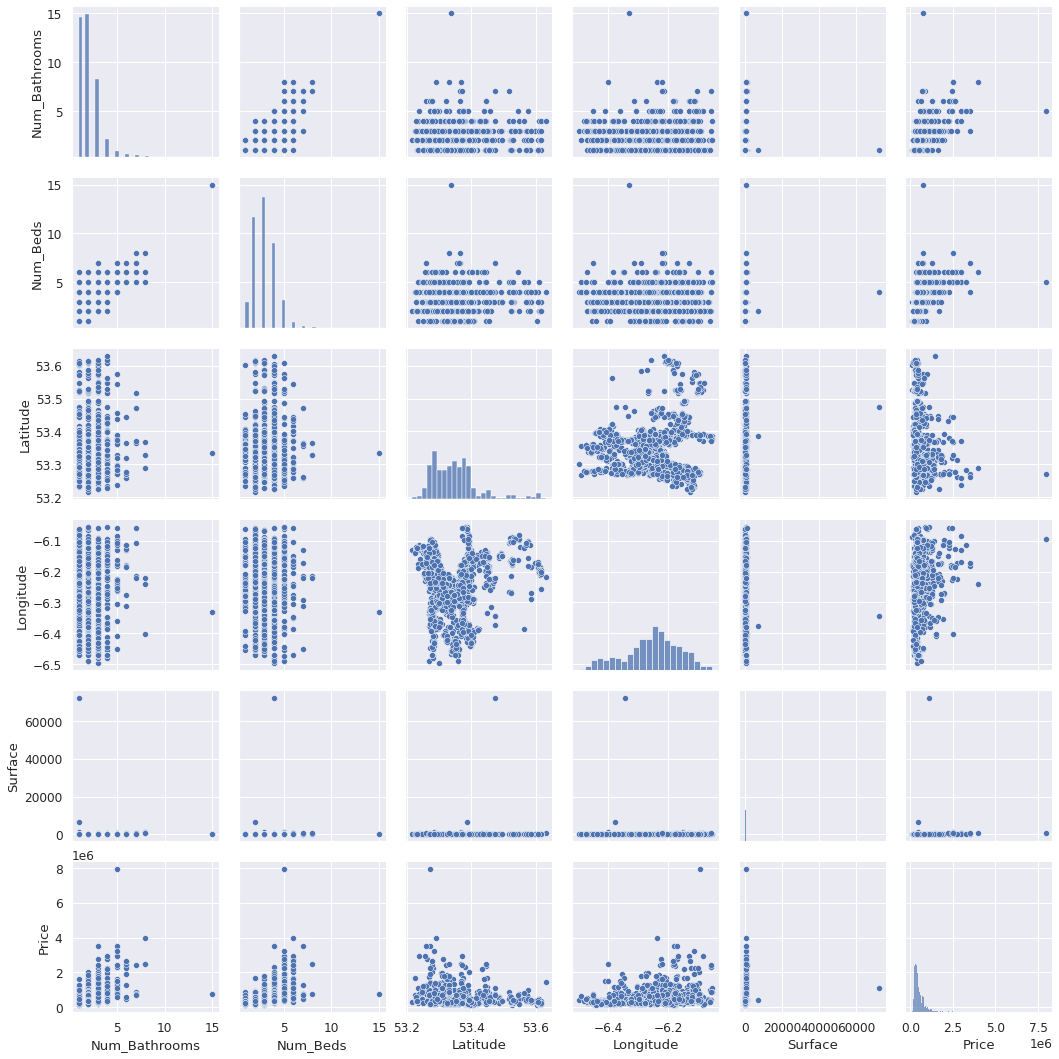

In [ ]:
# Pairplot to see the relationship between numerical features. The method dropna() drops all rows with missing values 
# No of units and facility are removed due to high number of NULL values
print('Pairplots of numerical features')
sns.pairplot(data=df_train[['Num_Bathrooms','BER_class','Num_Beds','Latitude','Longitude','Surface','Price']].dropna())
plt.show()

## Categorical Values

In [ ]:
# Get a read of Categorical Values
cat_cols = df_train.select_dtypes(include=['object'])     #strip out the categorical cols
cat_cols.columns[cat_cols.any()].tolist()           #convert col names to list
for i in cat_cols:                                  #loop through the cols
    print(cat_cols[i].value_counts(),"\n")          #print the summary to analyse

Castleknock     57
Malahide        50
Lucan           49
Rathfarnham     46
Clondalkin      41
                ..
Windy Arbour     1
Brittas          1
Newcastle        1
Oldbawn          1
Islandbridge     1
Name: Location, Length: 142, dtype: int64 

D1                     182
D2                     173
C3                     154
C2                     144
C1                     133
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64 

DNG McKenna Healy are delighted to bring to the market 41 Dun Emer Drive, a fantastic three bedroom family home with the added benefit of a cul-de-sac setting and a sunny West facing rear garden.  The property is in walk in condition throughout, boasting wonderful features such as s

In [ ]:
#Calculate missing values for the numerical features.
print(df_train.select_dtypes(exclude=['object']).isna().sum())

Index            0
ID               0
Num_Bathrooms    0
Num_Beds         0
Latitude         0
Longitude        0
Surface          0
Price            0
dtype: int64


# Analysis of Outliers

Analysis of outliers


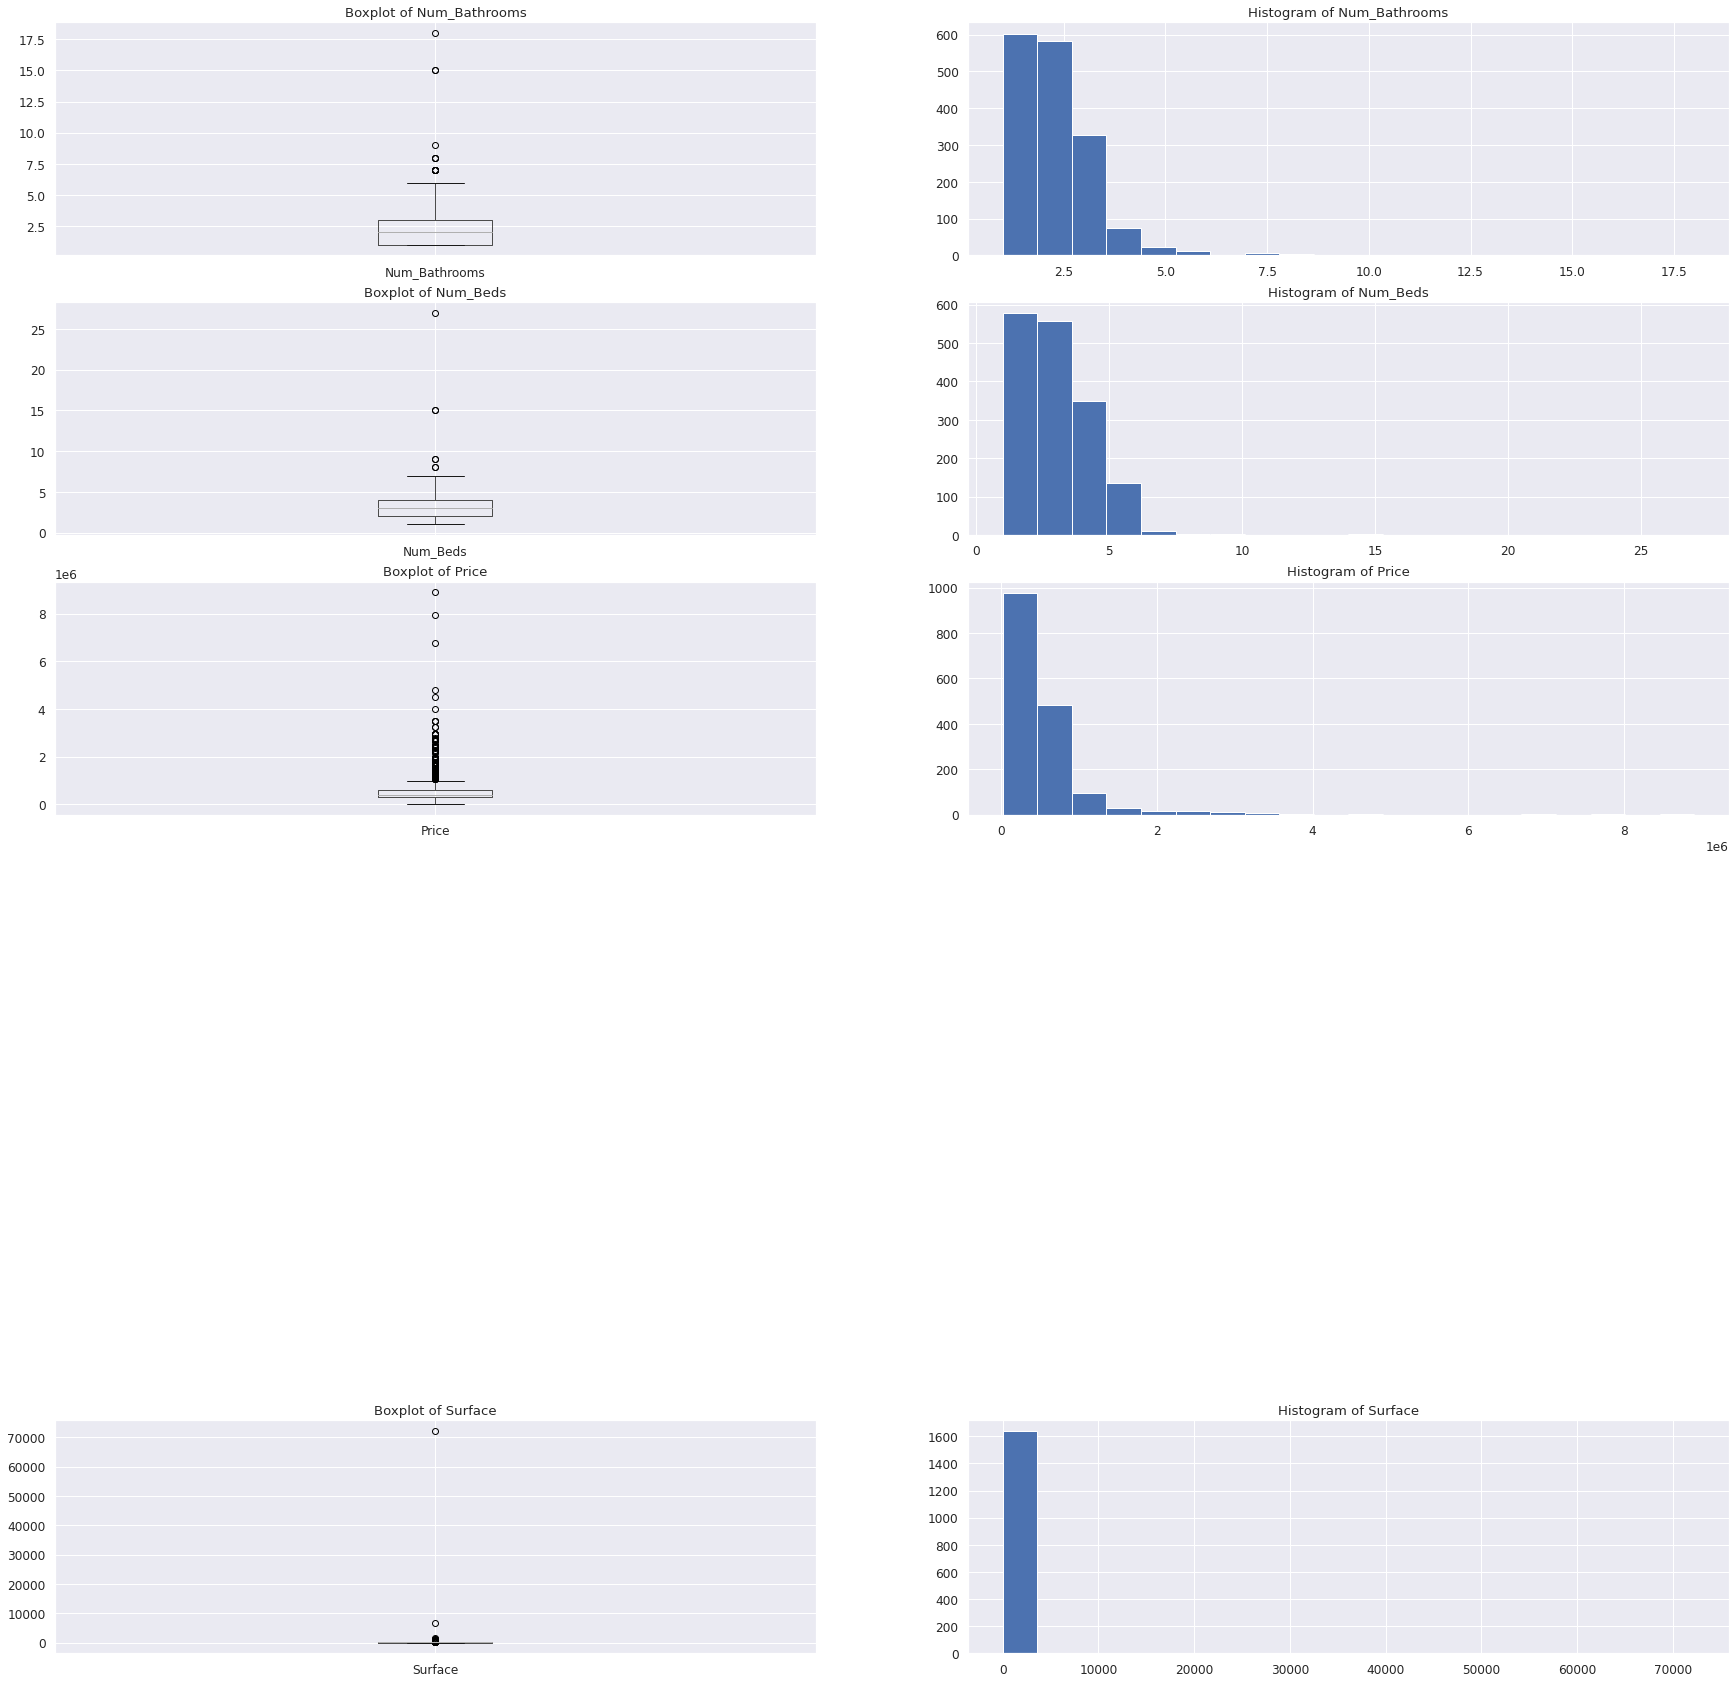

(1638, 14)


In [ ]:
def plot_box_hist(dframe, features):
    '''Function to plot Box / Histogram pair for any feature'''
    no_feats = len(features)
  
    figH = plt.figure(figsize=(30,no_feats*5))

    for i in range(0, no_feats): 
        if dframe[features[i]].dtype != object: 
          ax1 = figH.add_subplot(no_feats, 2, (i*2)+1)
          ax1.set_title("Boxplot of "+features[i])
          dframe.boxplot(column=[features[i]])

          ax2 = figH.add_subplot(no_feats, 2, (i*2)+2)
          ax2.set_title("Histogram of "+features[i])
          dframe[features[i]].hist(bins=20)

    plt.show()

#run print function
print("Analysis of outliers")
plot_box_hist(df_train, include_featues)
print(df_train.shape)

## EDA Summary
1. On initial examination of the data it was clear **description_block** and **features** were not in any format to systematically encode so it was decided early that these features would be the features used for NLP.
2. On analysis of the missing values it was seen that **Services** had more than 25% of their values missing which meant these features could be removed from further analysis.
3. Both **Index** and **ID** both are index features offering no value so can be disregarded from further analysis
5. **Location** is an interesting one as it has 156 unique entries and clearly could offer some value in the prediction of price. In the context of this problem, it was felt that one-hot encoding the data would lead to too many features running the risk of producing low signal regressors [Johannemann et al. 2020].
6.  **BER_class** and **Type** the selected to be the retained categorical data as they were distributed across the data set and could be ordinaly & one hot encoded without increasing the number of features too much.


# Data Prep / NLP Functions

A number of functions / pipeline were developed to pass the data through to produce the data in a format suitable for model building.

In [ ]:
# Function to Detection Outlier on one-dimentional datasets.
def prepare_data(dframe, train):
    '''Function to Prepare Data for Model'''
    
    #define encoder
    enc = OneHotEncoder(handle_unknown='ignore')

    # drop low value features
    dframe = dframe.drop(drop_features, axis=1)

    if 'BER_class' in dframe:
      # Ordinally BER
      BERMap = {
        "A1": 1,
        "A2": 2,
        "A3": 3,
        "B1": 4,
        "B2": 5,
        "B3": 6,
        "C1": 7,
        "C2": 8,
        "C3": 9,
        "D1": 10,
        "D2": 11,
        "E1": 12,
        "E2": 13,
        "F": 14,
        "G": 15,
        "SINo666of2006exempt" : 0
      }
      dframe['BER_class'] = dframe['BER_class'].replace(BERMap)

      # impute the mean for BER
      dframe['BER_class'].fillna(round(dframe['BER_class'].mean(),0), inplace=True) # Only 2nd hand properties are missing BER. Therefore, we input the average for 2nd hand ones

    if 'Type' in dframe:
    # encode Type
      property_type_mapper = {
        "apartment": 1,
        "bungalow": 5,
        "detached": 9,
        "duplex": 2,
        "end-of-terrace": 6,
        "semi-detached": 8,
        "site": 3,
        "studio": 0,
        "terraced": 4,
        "townhouse": 7
      }
      dframe['Type'] = dframe['Type'].replace(property_type_mapper)

    #one hot encode Location in Dataset
    if 'Location' in dframe:
      dframe = pd.get_dummies(dframe, columns=['Location'],
                              dummy_na=True, 
                              drop_first=True)
    
    
    # Strip out the outliers
    if train==True:
      for i in range(0, len(include_featues)): 
        #if (include_featues[i] != 'Price'):
        dframe = remove_outliers(dframe,include_featues[i])
    
      # Strip out the geo outliers
      index_train = dframe[(dframe['Longitude'] > -6.0)|(dframe['Latitude'] < 53.0)].index
      dframe.drop(index_train, inplace=True)

      dframe = dframe.reset_index(drop=True)

    return dframe

def nlp_data(dframe):
    '''Apply NLP Processing to a DataFrame'''

    for feature in dframe:
      # removing spaces
      if dframe[feature] is str:
        dframe[feature] = dframe[feature].str.replace("[^a-zA-Z#]", " ")
        
        # transforming to lowercase
        dframe[feature] = dframe[feature].apply(lambda x: x.lower())

        # Removing single letters
        dframe[feature] = dframe[feature].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
        
        # removing short words
        short_word = 4
        dframe[feature] = dframe[feature].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))

        # Tokenisation
        tokenised_doc = dframe[feature].apply(lambda x: x.split())

        # remove stop-words
        tokenised_doc = tokenised_doc.apply(lambda x: [item for item in x if item not in stop_words])

        # normalise
        tokenised_doc = tokenised_doc.apply(lambda x: [normalize(word) for word in blurb_words])

        # de-tokenization
        detokenized_doc = []
        for i,token in enumerate(tokenised_doc):
          #print(i,token)
          t = ' '.join(token)
          detokenized_doc.append(t)

        # Replace feature with the de-tokenised text
        # print("Idx {} Len of detok {}".format(i, len(detokenized_doc)))
        dframe[feature] = detokenized_doc

    return dframe


v_features = []
def vectorise_data(dframe,feature):
    v_array = vectorizer.fit_transform(dframe[feature])
    v_features = [str(x).replace(" ","_") for x in vectorizer.get_feature_names()]
    v_data = pd.DataFrame(data=np.hstack([v_array.toarray()]), columns=v_features)
    v_data = v_data.astype(bool).astype(int)
    #dframe = v_data

    return dframe, v_features

# function to normalize words
def normalize(words):
  normalized_words = list()
  for word in words:
    # remove  the most common words
    if word.lower() not in stop: 
      # stemming
      new_word = stemmer.stem(word) 
      # lower case
      normalized_words.append(new_word.lower()) 
  return normalized_words
  
# Function to Detection Outlier on one-dimentional datasets.
def remove_outliers(dframe, feature):
    '''Function to Detect / Remove Outliers'''
  
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(dframe[feature])
    random_data_mean = np.mean(dframe[feature])
    anomaly_cut_off = random_data_std * 2
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    dframe = dframe.drop(dframe[(dframe[feature] < lower_limit) | (dframe[feature] > upper_limit)].index)

    return dframe

# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

# Data Preparation




In [ ]:
# Apply Data Prepearation Pipeline
df_subset_train_prepped = prepare_data(df_train,True)

# Convert the text features to text
df_subset_train_prepped[nlp_features].astype(str)

# Apply NLP Pipeline to process the text freatures
df_subset_train_nlp = nlp_data(df_subset_train_prepped[nlp_features].astype(object))

# Combine the text features
df_subset_train_nlp['NLP_Features'] = df_subset_train_nlp['Features'] + df_subset_train_nlp['Description']

# Vectorise the feaures with list of features returned
df_subset_train_vector, test1feature = vectorise_data(df_subset_train_nlp,'Features')

# Join the extracted NLP features to the original dataframe
df_subset_train = pd.concat([df_subset_train_prepped, df_subset_train_vector], axis=1)

#drop the original text features
df_subset_train = df_subset_train.drop(nlp_features, axis=1)

if 'NLP_Features' in df_subset_train:
  df_subset_train = df_subset_train.drop('NLP_Features', axis=1)

# have a look at the resulting data set. This is the data set will train / test on
df_subset_train

,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price
0,2,2,9.0,53.396659,-6.438791,1,67.00,195000
1,1,2,10.0,53.357129,-6.239779,4,95.97,425000
2,1,3,12.0,53.261600,-6.166738,9,81.00,499000
3,3,4,10.0,53.550731,-6.121415,9,153.00,510000
4,1,3,12.0,53.380367,-6.279310,4,140.00,360000
...,...,...,...,...,...,...,...,...
1444,2,5,10.0,53.393812,-6.155420,8,182.00,395000
1445,1,1,10.0,53.325479,-6.277781,1,37.00,220000
1446,1,2,8.0,53.292767,-6.166668,5,64.00,500000
1447,3,5,7.0,53.284975,-6.178685,9,175.96,795000


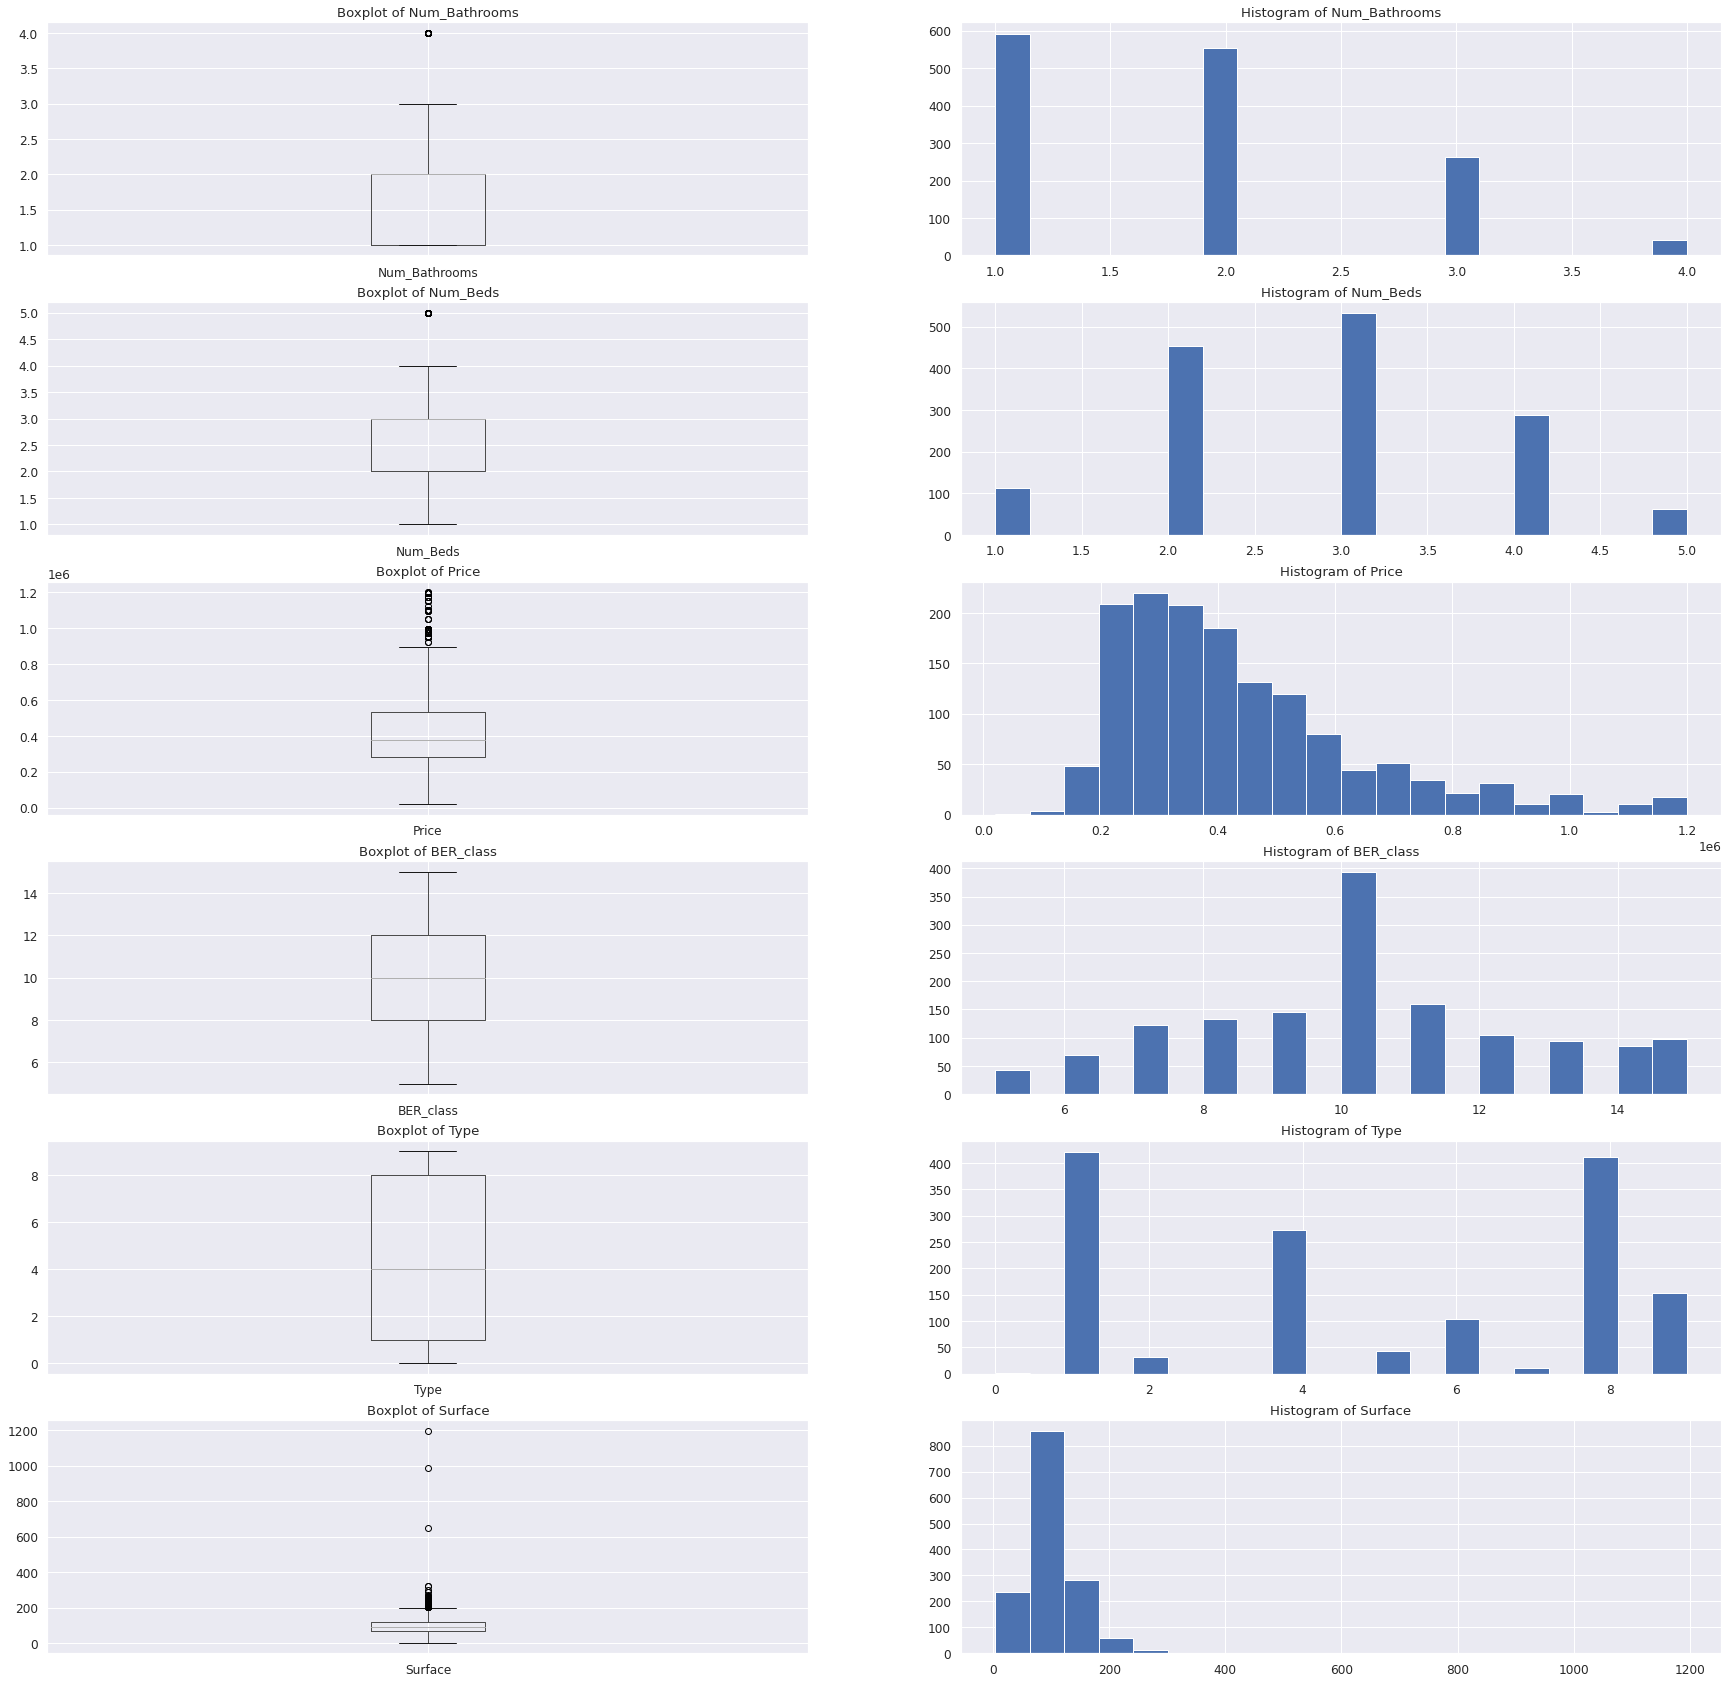

(1638, 14)


In [ ]:
# Sanity Check Outliers after the data preparaton
plot_box_hist(df_subset_train, include_featues)
print(df_train.shape)

In [ ]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

# drop any NA values residing after the data prep
df_subset_train = df_subset_train.dropna(axis=0)

# extract the cost data from the training data
df_cost = df_subset_train['Price']

# drop the cost from the trainig data set
df_subset_train = df_subset_train.drop(['Price'], axis=1)

# quick sanityc check on the data shape
print(df_subset_train.shape)
print(df_cost.shape)

(1449, 7)
(1449,)


## Trainig / Test Data Splitting

In [ ]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train,X_test,y_train,y_test = train_test_split(df_subset_train, df_cost, test_size=0.3)

### Train dataset

In [ ]:
# show first data frame rows 
X_train.head(2)

,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface
69,2,4,9.0,53.340659,-6.216355,6,108.0
91,2,4,10.0,53.364010,-6.294334,8,95.0


### Test dataset

In [ ]:
# show last data frame rows 
X_test.tail(2)

,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface
1053,2,3,13.0,53.380700,-6.248010,8,107.46
592,1,3,14.0,53.342672,-6.362635,6,115.50


### Expected Cost dataset

In [ ]:
# show first data frame rows 
y_train.head(2)

69    525000
91    375000
Name: Price, dtype: int64

In [ ]:
# train set, input columns
Xs_train = X_train.iloc[:,0:].values 

# train set, output column, cost
ys_train = y_train.values.reshape(-1, 1)

# test set, input columns
Xs_test = X_test.iloc[:,0:].values 

# sanity check on the data shape
print(Xs_train.shape)
print(ys_train.shape)
print(Xs_test.shape)
print(y_test.shape)

(1014, 7)
(1014, 1)
(435, 7)
(435,)


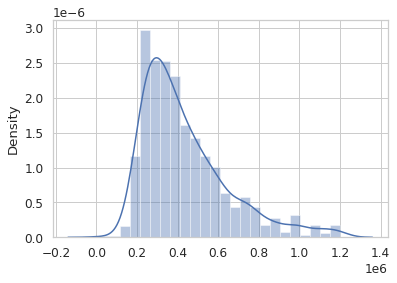

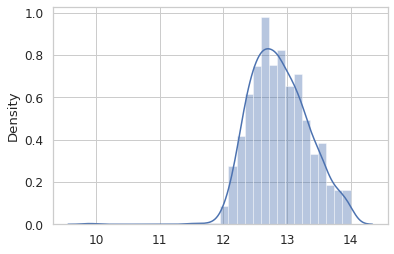

In [ ]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1#

sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

#Quick Analysis of House Price Data
x = ys_train
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

x_log = np.log(x)
sns.distplot(x_log)
plt.show()

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

# PIECEWISE REGRESSION

In [ ]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

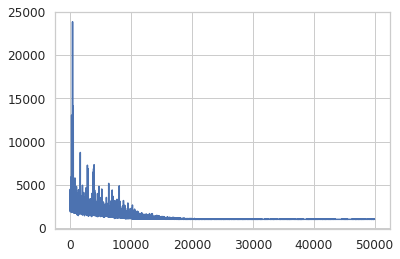

In [ ]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter, method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [ ]:
# samples from the posterior
posterior = approximation.sample(5000)

In [ ]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))
print("RMSLE = ",(mean_squared_log_error(y_test,y_pred_BLR)))


MAE =  146662.28391287333
MAPE =  0.3298649524212552
RMSLE =  0.11327915067976145


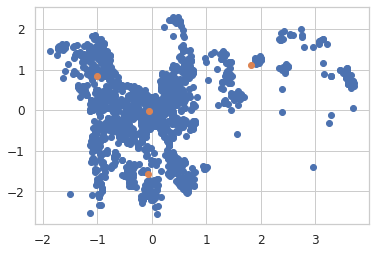

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
# clustering by features 1, 2
if 'BER_class' in X_train:
  ind=[3,4]
else:
  ind=[2,3]

X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])

In [ ]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 531, 1: 129, 2: 175, 3: 179}

In [ ]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 202, 1: 70, 2: 83, 3: 80}

In [ ]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]
ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [ ]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [ ]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [ ]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [ ]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)


In [ ]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

In [ ]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

In [ ]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

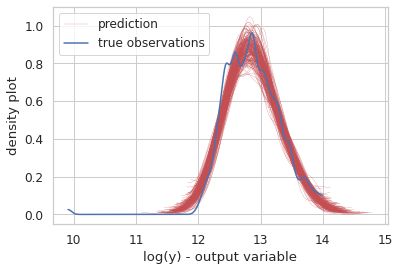

In [ ]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

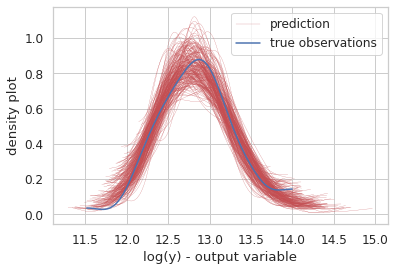

In [ ]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

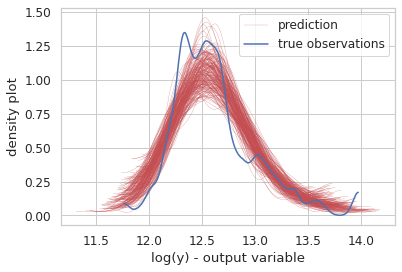

In [ ]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

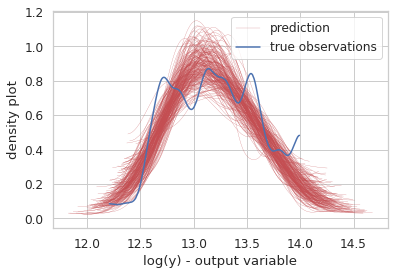

In [ ]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

In [ ]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3])])

# joint MAPE
joint_MAPE=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]) / y_test[clusters_test==0],
                     abs(y_pred_BLR1 - y_test[clusters_test==1]) / y_test[clusters_test==1],
                     abs(y_pred_BLR2 - y_test[clusters_test==2]) / y_test[clusters_test==2],
                     abs(y_pred_BLR3 - y_test[clusters_test==3]) / y_test[clusters_test==3]
                    ])

# joint RMSLE
joint_rmsle=np.hstack([mean_squared_log_error(y_test[clusters_test==0],y_pred_BLR0),
                 mean_squared_log_error(y_test[clusters_test==1],y_pred_BLR1),
                 mean_squared_log_error(y_test[clusters_test==2],y_pred_BLR2),
                 mean_squared_log_error(y_test[clusters_test==3],y_pred_BLR3)])

# MAE
print("MAE=",np.mean(joint))

# MAPE
print("MAPE=",np.mean(joint_MAPE))

# RMSLE
print("RMSLE=",np.mean(joint_rmsle))

Size Cluster0 202 , MAE Cluster0= 102059.55149044187
Size Cluster1 70 , MAE Cluster1= 73381.06896317733
Size Cluster2 83 , MAE Cluster2= 52480.03767880122
Size Cluster3 80 , MAE Cluster3= 900902.3890254747
MAE= 234898.2493744141
MAPE= 0.5156677190404801
RMSLE= 0.12654260416310154


Big Shoutout to Nigel P for implementation of the BNN in code!
**bold text**


In [ ]:
# your code here

# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])
floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=1,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=1,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [ ]:
# some parameters
par1 = 30  # start with 100, then use 1000+
par2 = 300 # start with 1000, then use 10000+

# neural network
with neural_network:
    posterior = pm.sample(par1,tune=par2,chains=1)

In [ ]:
# we can do instead an approximated inference
param3 = 50000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.0008    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

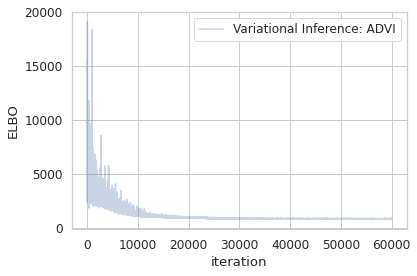

In [ ]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [ ]:
# draw samples from variational posterior
D = 500
posterior = approx.sample(draws=D)

In [ ]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])
y_final_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_final_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_final_pred = np.array(y_final_pred).mean(axis=0)

In [ ]:
#We need to do the inverse transformation and scaling that was carried out on the y values at the start
y_val_pred_final = np.exp(yscaler.inverse_transform(y_final_pred))

print("MAE = ",(np.mean(abs(y_val_pred_final - y_test))))
print("MAPE = ",(np.mean(abs(y_val_pred_final - y_test) / y_test)))
print("RMSLE = ",(mean_squared_log_error(y_test,y_val_pred_final)))

print("Dropped = ", drop_features)
print("NLP = ", vectorizer)

# show first data frame rows 
print(X_train.head(2))

MAE =  65145.61949728558
MAPE =  0.14989678099604567
RMSLE =  0.03558376729209553
Dropped =  ['Index', 'ID', 'Services', 'Location']
NLP =  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=5,
                min_df=1, ngram_range=(2, 5), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
    Num_Bathrooms  Num_Beds  BER_class   Latitude  Longitude  Type  Surface
69              2         4        9.0  53.340659  -6.216355     6    108.0
91              2         4       10.0  53.364010  -6.294334     8     95.0


# TEST DATA SET

In [ ]:
df_test_prepped = prepare_data(df_test, False)
df_test_prepped[nlp_features].astype(str)
df_test_nlp = nlp_data(df_test_prepped[nlp_features].astype(object))
df_test_vector, test2feature = vectorise_data(df_test_nlp,'Features')

df_test_full = pd.concat([df_test_prepped, df_test_vector], axis=1)

df_test_full = df_test_full.drop(nlp_features, axis=1)

cols1 = df_test_full.columns
cols2 = X_test.columns

diff_cols = cols2.difference(cols1)

matching = [s for s in diff_cols if "Location_" in s]

print(X_test.shape, df_test_full.shape)

for i in range(X_test.shape[1] - df_test_full.shape[1]):
   df_test_full["Dummy"+str(i)] = 0

print(X_test.shape, df_test_full.shape)

(435, 7) (702, 7)
(435, 7) (702, 7)


In [ ]:
Xt_test = df_test_full.iloc[:,0:].values 
Xtt_test = np.hstack([Xt_test,Xt_test[:,[2]]**2])
xtscaler = sc.fit(Xtt_test)
Xtn_test = xtscaler.transform(Xtt_test)

In [ ]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xtn_test.shape[0],1)), Xtn_test])
y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

y_pred_final = np.round(np.exp(yscaler.inverse_transform(y_pred)),2)

In [ ]:
g6_kaggle_price = pd.DataFrame(y_pred_final, columns=['Price'])
test_predictions = pd.concat([df_test['Index'], g6_kaggle_price.astype(int)], axis=1)
test_predictions.to_csv(Path + 'ET5003_BayesianNN_Kaggle_Team6.csv', index=False)

# REFERENCES

Thatdatatho.com. 2021. Predicting Housing Prices with Natural Language Processing NLP and Tidymodels. [online] Available at: <https://thatdatatho.com/predicting-housing-prices-nlp/> [Accessed 8 October 2021]

Medium. 2021. House Prices Prediction Using Deep Learning. [online] Available at: <https://towardsdatascience.com/house-prices-prediction-using-deep-learning-dea265cc3154> [Accessed 8 October 2021]

Arno.uvt.nl. Predicting Real Estate Price Using Text Mining 2021. [online] Available at: <http://arno.uvt.nl/show.cgi?fid=134740> [Accessed 11 October 2021].

Medium. 2021. Probabilistic Deep Learning for Breast Cancer Detection. [online] Available at: <https://towardsdatascience.com/probabilistic-neural-networks-for-breast-cancer-detection-2f1a6951e459> [Accessed 17 October 2021].




# SUMMARY

 
As put forward in the introduction, the objective of this exercise was to predict the price of a set of houses using advanced machine learning. My approach involved applying EDA and building a pipeline to include preparing the data, building the Piecewise Regression Model and Bayesian Neural Network, applying the generated models to the live data.
 
The data set consisted of a combination of numeric, categorical and text data so the data prep pipeline was built up using the appropriate encoding, inputting and scaling. The NLP pipeline was built up using NLP processing methods and the top text phrases were extracted and then appended to the original data set to see if they would improve the results. Once the pipelines were in place it allowed me to experiment with combinations of features to see if the results could be improved.
 
One distinct difference I have observed is the time it takes to generate the regression model over the Neural Network. What I did notice is that the Regression model could act as a good pre-cursor (to test a set of features) before you go to build the NN. That strikes me as a practical test that could be used.
 
In the experimentation of including the NLP features, no improvement in output was conclusively observed. I experimented with the number of n-grams (varying n), using just [Features] and combining [Features / Description]. I also experimented with using the TF-IDF score as the training value as opposed to binarizing them (i.e., a non-zero value is mapped to 1). 
 
The conclusion drawn here (and I think found across the forums) is that the NLP features hold little value in predicting the prices. However, the exercise was very enlightening as to how they can be processed/generated.
 
The following is a simple comparison of scores based on certain configurations: https://docs.google.com/spreadsheets/d/11nd3u3rh_F17yX61bgBy99RTi4LRznhtNx3t7chLYbM/edit?usp=sharing. This sheet has a range of tests with results - the three sheets represent the 3xSD, 2.5xSD and 2xSD outlier detection limits as described below.
 
With that in hand the configuration I implemented:
1.   Data Preparation Pipeline
  1.   drop low value features
  2. ordinally encode BER (if in Dataset - allows for tuning)
  3. impute the mean for BER (if in Dataset - allows for tuning)
  4. ordinally encode Type (if in Dataset - allows for tuning)
  5. one hot encode Location (if in Dataset - allows for tuning)
  6. strip out the outliers (on numeric features - bases on z-score)
  7. strip out the geo outliers (manual on inspection)
2.   NLP Pipeline
  1. Extract selected text fields into a temp Data Frame
  2. remove anything but letters i.e., punctuation, numbers etc
  3. transforming to lowercase
  4. Removing single letters
  5. removing short words (less than 4 letter)
  6. Tokenization the phrases (split on space)
  7. remove stop-words
  8. normalise using stemming
  9. de-tokenization (re-join phrases)
  10. Replace feature with the de-tokenized text
  11. Apply TF-IDX to the processed text features
  12. Append new NLP features with the original Dataset and drop the text based features
3. Model Development
  1. Built up a simple baseline Bayesian Regression model as a baseline for comparison (using MAE, MAPE, RMSLE) to Piecewise and Bayesian Neural Network
  2. Cluster the data based on Longitude / Latitude Features (4 Components)
  3. Built up a Baysian Regression Model per cluster - validated each one and took the mean of the error scores
  4. Built up a Bayesian Neural Network and validated it against the same validation data and compared Results.
  5. Once a satisfactory configuration was identified - re-running the pipeline yielded a variation in output with the RMSLE varying significantly.
4. Live Predictions
  1. Live Data was passed through the Data Prep, NLP Pipeline and then passed through the BNN Model to produce a set of predictions. This file was then tested on Kaggle
 
# Observations
1. The regression model seemed to react more positively to NLP features than the NN. As we reduced NLP features towards 0 the NN performance improved and REG one dis-improved.
2. Outlier removal - all my initial tests used 3 times the Standard Deviation around the man as the limit for outlier detection and removal - I started to tighten this to 2.5 and 2 and sas visible improvement.
3. BNN outperforms REG on all tests bar the test I used the max number of NLP features (20) so is the preference for prediction calculation
4. The REG models are far quicker to generate and always give a good indication that the BNN will improve as the BNN is generating. 
 
# Selected Configuration
1. Include BER_Class, Type, Surface, Num_Bedrooms, Num_bathrooms
2. Ordinally Encode BER_Class, Type
3. Use SD x 2 as the outlier detection threshold
4. Use BNN model over the B-REG model
 
# Final Run
1. Based on the above parameters I selected a configuration
2. Increased the paramateres on the NN config (Sample, iterations etc)
3. Results from the NN yeilded:
  1. MAE =  65145.61949728558
  2. MAPE =  0.14989678099604567
  3. RMSLE =  0.03558376729209553
4. Kaggle Result on this run : 0.42934
 
 
 
 
 


